# Análisis de redes con NetworkX
---
Juan Camilo Arboleda Rivera

In [2]:
import networkx as nx

In [3]:
# Crear un objeto Grafo vacío
red = nx.Graph()

Podemos añadir nodos:

In [5]:
red.add_node("A")

In [6]:
red.add_nodes_from(['A','B','C','D', 'E'])

Y también añadir aristas:

In [7]:
red.add_edges_from([('B','C'), ('A','C'), ('B','D'), ('D','A'), ('D','E'), ('B','E')])

Los enlaces se pueden asociar a cualquier objeto:

In [8]:
x = [0.3, 0.6, 0.9]

In [9]:
red.add_edge('F', 'D', object=x)

## Información de la red

Ver los nodos:

In [10]:
print(red.nodes())

['A', 'B', 'C', 'D', 'E', 'F']


Ver los enlaces:

In [11]:
print(red.edges())

[('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('D', 'E'), ('D', 'F')]


Ver los enlaces como lista de adyacencia:

In [12]:
print(red.adj)

{'A': {'C': {}, 'D': {}}, 'B': {'C': {}, 'D': {}, 'E': {}}, 'C': {'B': {}, 'A': {}}, 'D': {'B': {}, 'A': {}, 'E': {}, 'F': {'object': [0.3, 0.6, 0.9]}}, 'E': {'D': {}, 'B': {}}, 'F': {'D': {'object': [0.3, 0.6, 0.9]}}}


In [13]:
red.number_of_nodes()

6

In [14]:
red.number_of_edges()

7

In [15]:
nx.info(red)

'Graph with 6 nodes and 7 edges'

In [16]:
nx.diameter(red)

3

In [17]:
nx.is_connected(red)

True

### Visualización de la red

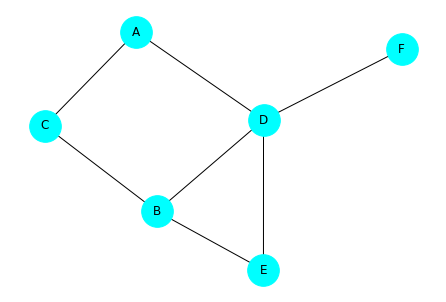

In [25]:
import matplotlib.pyplot as plt
nx.draw(red, with_labels = True, node_size=1000, node_color='cyan')
#nx.draw(red)

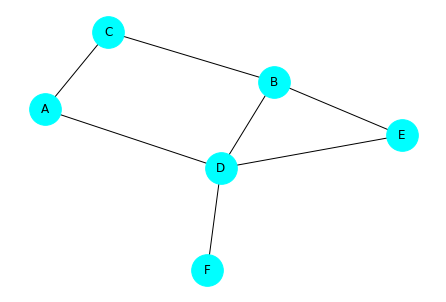

In [26]:
# Guardar gráfica
#nx.draw(red, with_labels = True)
nx.draw(red, with_labels = True, node_size=1000, node_color='cyan')
plt.savefig("/home/nesper94/tmp/networkx.pdf")

### Grado de los nodos

In [27]:
red.degree()

DegreeView({'A': 2, 'B': 3, 'C': 2, 'D': 4, 'E': 2, 'F': 1})

In [28]:
red.degree('C')

2

### Medidas de centralidad

In [29]:
nx.algorithms.degree_centrality(red)

{'A': 0.4, 'B': 0.6000000000000001, 'C': 0.4, 'D': 0.8, 'E': 0.4, 'F': 0.2}

Betweenness centrality

In [32]:
nx.betweenness_centrality(red)

{'A': 0.1, 'B': 0.2, 'C': 0.05, 'D': 0.55, 'E': 0.0, 'F': 0.0}

Eigenvector centrality

In [33]:
nx.eigenvector_centrality(red)

{'A': 0.34101233573509077,
 'B': 0.4981656262056795,
 'C': 0.3228765825656424,
 'D': 0.563437771403002,
 'E': 0.4084543148167931,
 'F': 0.21678389847563684}

## Red del club de Karate

In [34]:
G = nx.karate_club_graph()

Dibujar la red usando la disposición de resortes:

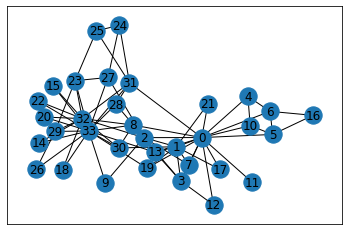

In [38]:
karate_pos = nx.spring_layout(G, k=.1)
nx.draw_networkx(G, karate_pos)

## Análisis de comunidades

Para este necesitamos el paquete `louvain`, que instalamos con:
```bash
pip install python-louvain
```

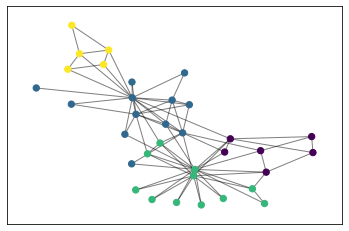

In [39]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# cargar la red del club de karate
G = nx.karate_club_graph()

# computar la mejor partición
partition = community_louvain.best_partition(G)

# dibujar el grafo
pos = nx.spring_layout(G)
# colorear los nodos de acuerdo a su partición
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Exportar red a formato [Gephi](https://gephi.org/)

In [ ]:
nx.write_gexf(P, 'network.gexf')

## Redes pesadas

In [40]:
G = nx.Graph()
E = [('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 5), ('B', 'E', 3), ('C', 'E', 2)]
G.add_weighted_edges_from(E)

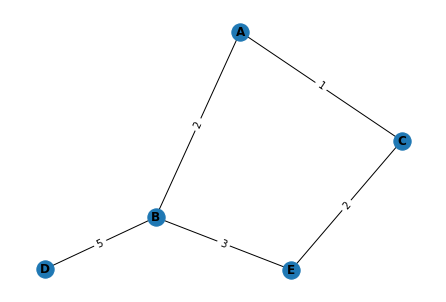

In [41]:
pos=nx.spring_layout(G) # Generar posición de los nodos
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight') # Obtener el peso de los enlaces
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

## Grafos cuyos nodos son grafos

In [42]:
G.add_node(red)

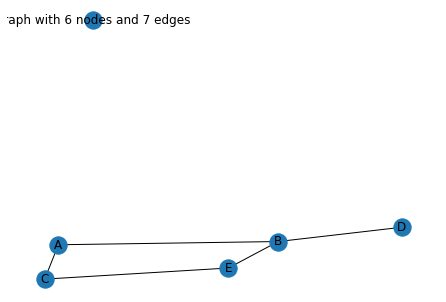

In [43]:
nx.draw(G, with_labels=True)

## Generación de redes aleatorias

### Red de Erdös-Renyi
`erdos_renyi_graph(n, p[, seed, directed])`

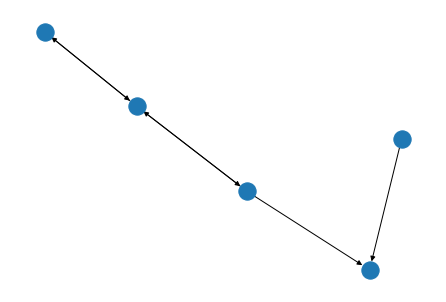

In [48]:
nx.draw(nx.erdos_renyi_graph(5, .3, directed=True))

### Red de Barabasi-Albert
`barabasi_albert_graph(n, m)`

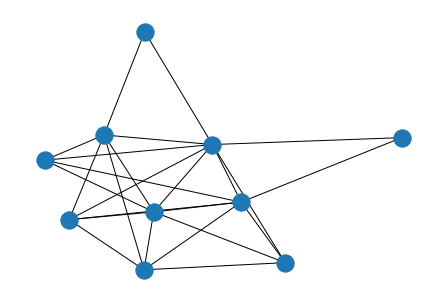

In [54]:
nx.draw(nx.barabasi_albert_graph(10, 5))

## Matriz de adyacencia

In [56]:
nx.adjacency_matrix(red).todense()

matrix([[0, 0, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0]])

In [57]:
print(nx.adjacency_matrix(red).todense())

[[0 0 1 1 0 0]
 [0 0 1 1 1 0]
 [1 1 0 0 0 0]
 [1 1 0 0 1 1]
 [0 1 0 1 0 0]
 [0 0 0 1 0 0]]


## Exportar e importar redes

In [58]:
nx.write_gml(red, "/home/nesper94/tmp/red.gml")

In [59]:
delfines = nx.read_gml("datos/dolphins/dolphins.gml")

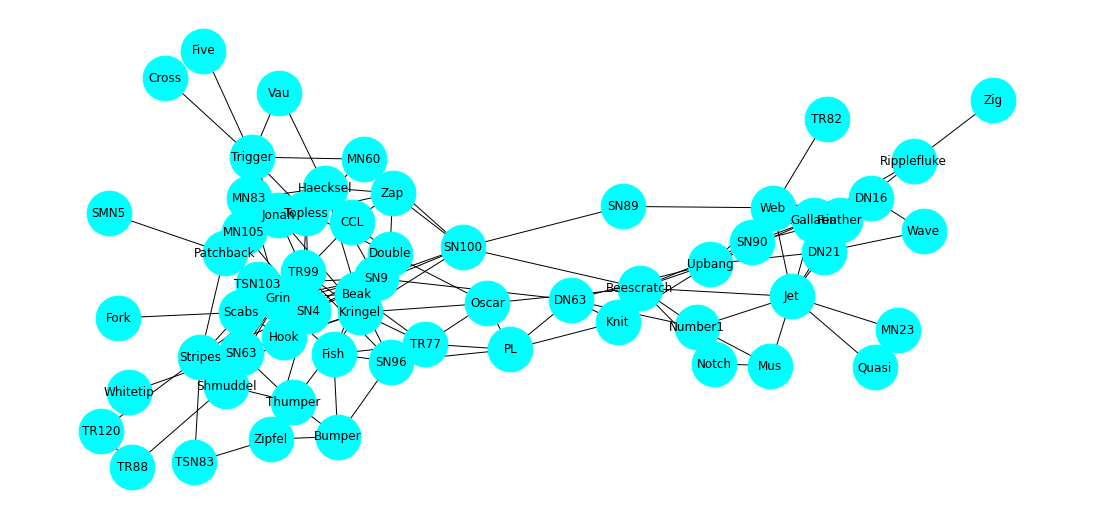

In [61]:
fig = plt.figure(figsize=(15,7))
nx.draw(delfines, with_labels=True, node_color='cyan', node_size=2000)

In [62]:
nx.eigenvector_centrality(delfines)

{'Beak': 0.1285035191108721,
 'Beescratch': 0.04209144143572481,
 'Bumper': 0.0397571330980105,
 'CCL': 0.07933447607445518,
 'Cross': 0.029287057142628192,
 'DN16': 0.006572752164517535,
 'DN21': 0.012211980286547347,
 'DN63': 0.04290802005630266,
 'Double': 0.14310221675120957,
 'Feather': 0.01222016976446843,
 'Fish': 0.0752534643510351,
 'Five': 0.029287057142628192,
 'Fork': 0.039075861161635264,
 'Gallatin': 0.015030415487480686,
 'Grin': 0.3157810764804675,
 'Haecksel': 0.1641749113833966,
 'Hook': 0.20799316926734226,
 'Jet': 0.017534968338682344,
 'Jonah': 0.20249300124247613,
 'Knit': 0.020682545955984934,
 'Kringel': 0.1844778733532397,
 'MN105': 0.2073496172237698,
 'MN23': 0.0024382375398253435,
 'MN60': 0.08736202260403905,
 'MN83': 0.19321180983300898,
 'Mus': 0.005952326426510384,
 'Notch': 0.008949192287688038,
 'Number1': 0.016326687320731028,
 'Oscar': 0.06822697202643722,
 'Patchback': 0.2117610946447421,
 'PL': 0.04075065098782636,
 'Quasi': 0.0024382375398253435,


[Análisis de redes con iGraph](Análisis%20de%20redes%20con%20iGraph.ipynb)